In [23]:
import KCFutil
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import random_split, TensorDataset
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import clear_output
from sklearn.model_selection   import train_test_split
import time
np.random.seed(2456)

In [24]:
possible_aa = list(KCFutil.aminoacids.keys())
possible_aa.remove('C')
test=''
for i in range (31):
    random_aa = np.random.choice(possible_aa)
    test+=random_aa

test=KCFutil.peptide(test)

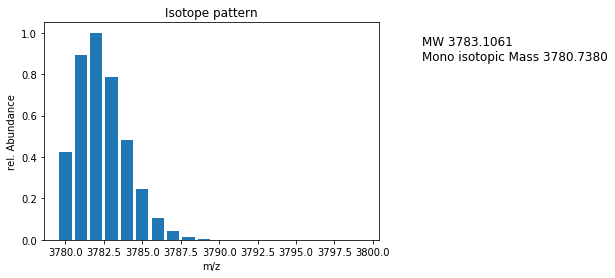

In [25]:
test.info()

In [26]:
test.sequence

'HLRNPTNEDHSYDAHEANWIFITQTLIMDWN'

In [44]:
col={'Sequence' : [],'Receptor_1': [],'Receptor_2': []}
database=pd.DataFrame(col)

In [45]:
database.loc[0]=[test.sequence]+ [0,0]

In [49]:
database

,Sequence,Receptor_1,Receptor_2
0,HLRNPTNEDHSYDAHEANWIFITQTLIMDWN,0.0,0.0


In [81]:
def mutation(sequence):
    possible_aa = list(KCFutil.aminoacids.keys())
    possible_aa.remove('C')
    mut=np.random.randint(0,len(sequence))
    random_aa = np.random.choice(possible_aa)
#    print (mut+1, random_aa)
    seq=sequence[:mut]+random_aa+sequence[mut+1:]
#    print (seq)
    return seq

In [131]:
library={test.sequence : [0,0]}

ref_frag1=test.sequence[0:6]
ref_frag1=KCFutil.peptide(ref_frag1)
ref_frag2=test.sequence[10:16]
ref_frag2=KCFutil.peptide(ref_frag2)


while len(library)<300:
    new_seq=mutation(test.sequence)
    new_seq=KCFutil.peptide(new_seq)
    new_frag=new_seq.sequence[0:6]
    new_frag=KCFutil.peptide(new_frag)
    dist1=KCFutil.distance(ref_frag1,new_frag)
    
    new_frag=new_seq.sequence[10:16]
    new_frag=KCFutil.peptide(new_frag)
    dist2=KCFutil.distance(ref_frag2,new_frag)
    
    z1_contri=[test.zscale5[i] for i in range(0,len(test.zscale5),5)]
    z1_contri=sum(z1_contri)/100
    
    z5_contri=[test.zscale5[i] for i in range(4,len(test.zscale5),5)]
    z5_contri=sum(z5_contri)/100
    
    library[new_seq.sequence]=[(dist1/10.0+dist2/100.0-z1_contri-z5_contri)+(np.random.normal(0,0.1)), 0]

In [132]:
list_lib=[(i,j) for i,j in library.items()]

In [135]:
for j,i in enumerate(list_lib):
    database.loc[j]=[i[0]]+ i[1]

In [137]:
database.head()

,Sequence,Receptor_1,Receptor_2
0,HLRNPTNEDHSYDAHEANWIFITQTLIMDWN,-0.115834,0.0
1,HLRNPTNEDHSYDAHEANWIFITQTLIMAWN,-0.124432,0.0
2,HLRNPTNEDHSYDAHEAKWIFITQTLIMDWN,-0.041332,0.0
3,HLRNPTNEDHSYDAHEANWSFITQTLIMDWN,-0.242947,0.0
4,HLRNPTNEDHSYDAHEANWRFITQTLIMDWN,-0.082559,0.0


In [139]:
database.iloc[0:100].to_csv('test Lib1.csv')
database.iloc[100:200].to_csv('test Lib2.csv')
database.iloc[200:].to_csv('test Lib3.csv')